In [1]:
!pip uninstall -y nltk
!pip install nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.0 MB/s eta 0:00:00


Please upload your dataset (CSV file).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving labeled_data.csv to labeled_data.csv

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None

=== First 5 Rows ===
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3     

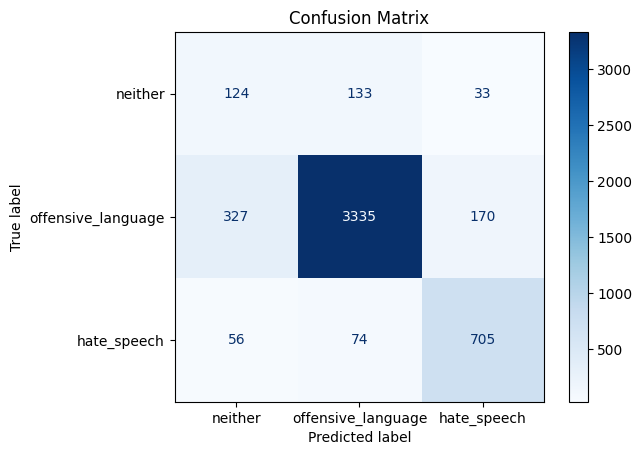

Confusion Matrix saved as 'confusion_matrix.png'.


In [2]:


# Step 2: Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import nltk
from nltk.corpus import stopwords
import string

# Ensure NLTK resources are downloaded
nltk.download('stopwords')

# Step 3: Upload dataset
from google.colab import files

print("Please upload your dataset (CSV file).")
uploaded = files.upload()

# Assuming the uploaded file is named "labeled_data.csv"
dataset_path = list(uploaded.keys())[0]
df = pd.read_csv(dataset_path)

# Step 4: Display basic information about the dataset
print("\n=== Dataset Information ===")
print(df.info())
print("\n=== First 5 Rows ===")
print(df.head())

# Step 5: Preprocessing
# Map 'class' column to target variable and clean 'tweet' column
print("\nPreprocessing the dataset...")
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)

# Step 6: Prepare features and target
X = df['cleaned_tweet']
y = df['class']

# Step 7: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 9: Handle class imbalance using SMOTE
print("\nApplying SMOTE for class imbalance...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)
print("Resampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Step 10: Train a Logistic Regression model
print("\nTraining Logistic Regression model...")
model = LogisticRegression(max_iter=200)
model.fit(X_train_resampled, y_train_resampled)

# Step 11: Evaluate the model
y_pred = model.predict(X_test_vec)
print("\n=== Model Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 12: Display Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neither', 'offensive_language', 'hate_speech'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

print("Confusion Matrix saved as 'confusion_matrix.png'.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Please upload your dataset CSV file...


Saving labeled_data.csv to labeled_data (1).csv

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None

=== First 5 Rows ===
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3 

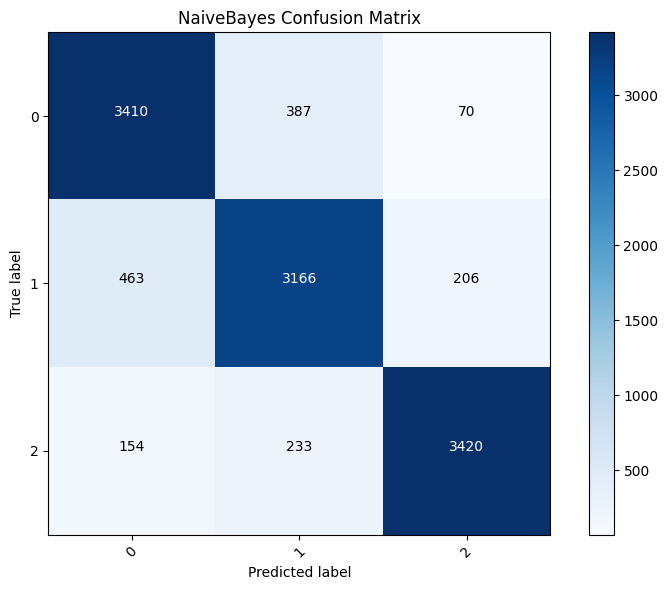

Confusion Matrix saved as 'NaiveBayes_confusion_matrix.png'.

=== LogisticRegression Model Training ===
Accuracy: 0.8969502128768789
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3867
           1       0.93      0.84      0.88      3835
           2       0.88      0.98      0.93      3807

    accuracy                           0.90     11509
   macro avg       0.90      0.90      0.90     11509
weighted avg       0.90      0.90      0.90     11509

Confusion Matrix:
[[3349  219  299]
 [ 407 3232  196]
 [  32   33 3742]]


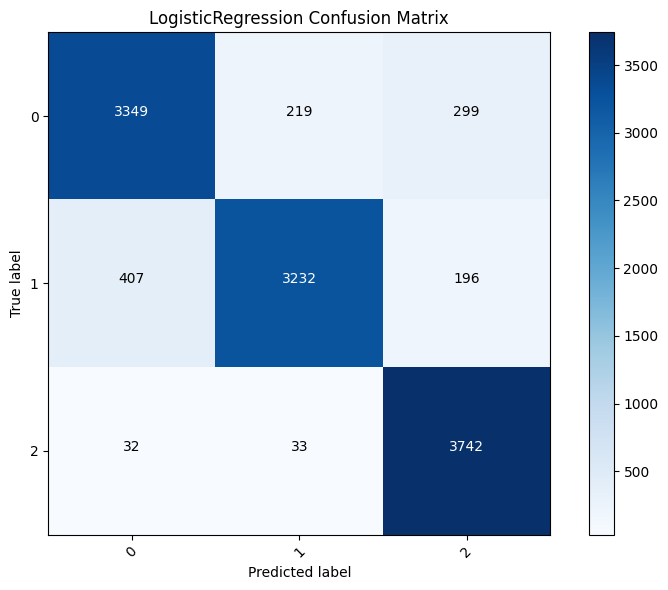

Confusion Matrix saved as 'LogisticRegression_confusion_matrix.png'.

=== DecisionTree Model Training ===
Accuracy: 0.9375271526631332
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3867
           1       0.95      0.89      0.92      3835
           2       0.95      0.97      0.96      3807

    accuracy                           0.94     11509
   macro avg       0.94      0.94      0.94     11509
weighted avg       0.94      0.94      0.94     11509

Confusion Matrix:
[[3706  105   56]
 [ 282 3403  150]
 [  44   82 3681]]


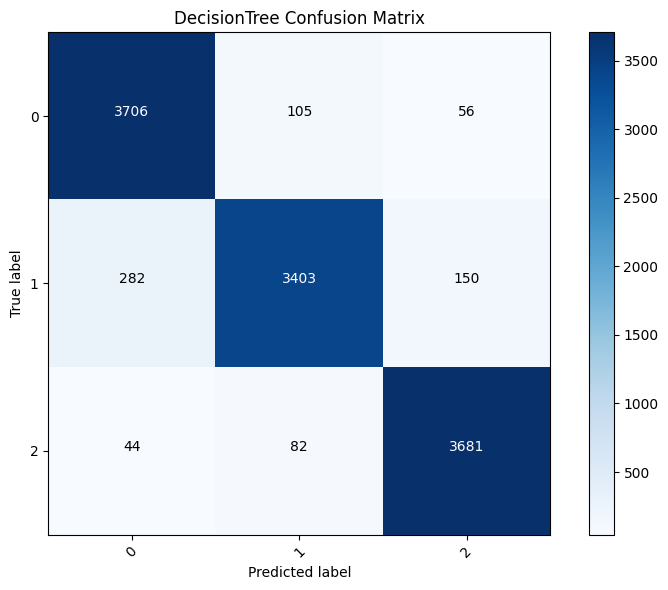

Confusion Matrix saved as 'DecisionTree_confusion_matrix.png'.

=== KNN Model Training ===
Accuracy: 0.7090972282561474
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      3867
           1       0.99      0.19      0.32      3835
           2       0.63      0.98      0.77      3807

    accuracy                           0.71     11509
   macro avg       0.79      0.71      0.64     11509
weighted avg       0.79      0.71      0.65     11509

Confusion Matrix:
[[3708    2  157]
 [1112  731 1992]
 [  78    7 3722]]


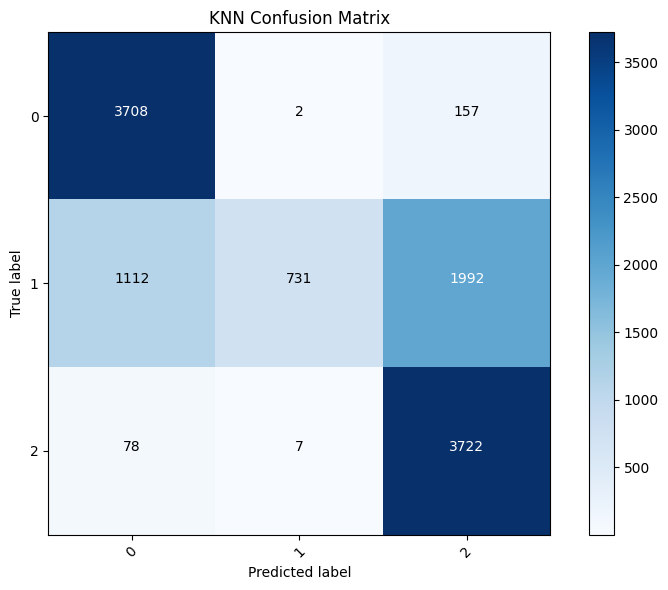

Confusion Matrix saved as 'KNN_confusion_matrix.png'.

=== RandomForest Model Training ===
Accuracy: 0.9589017290815883
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3867
           1       0.98      0.91      0.94      3835
           2       0.95      0.99      0.97      3807

    accuracy                           0.96     11509
   macro avg       0.96      0.96      0.96     11509
weighted avg       0.96      0.96      0.96     11509

Confusion Matrix:
[[3785   41   41]
 [ 186 3498  151]
 [  16   38 3753]]


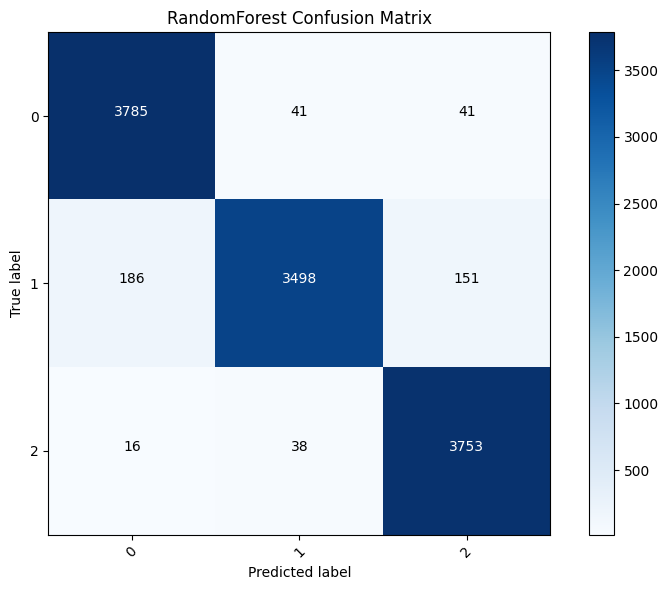

Confusion Matrix saved as 'RandomForest_confusion_matrix.png'.

=== Custom Prompt Testing ===
Prompt: 'I hate you and your family!'
Predicted Label: 0

Prompt: 'This is such a beautiful day.'
Predicted Label: 2

Prompt: 'You are so stupid.'
Predicted Label: 0

Prompt: 'Thank you for your kindness.'
Predicted Label: 2

Prompt: 'All people should have equal rights.'
Predicted Label: 0



In [1]:
# Step 1: Install necessary libraries

import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from google.colab import files
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Step 3: Upload dataset
print("Please upload your dataset CSV file...")
uploaded = files.upload()
dataset_path = list(uploaded.keys())[0]

# Step 4: Load the dataset
df = pd.read_csv(dataset_path)
print("\n=== Dataset Information ===")
print(df.info())
print("\n=== First 5 Rows ===")
print(df.head())

# Step 5: Basic checks (assume columns: 'tweet' and 'class')
# If your dataset uses different columns for text and label, adjust here
assert 'tweet' in df.columns, "Column 'tweet' not found."
assert 'class' in df.columns, "Column 'class' not found."

# Step 6: Data preprocessing
print("\nPreprocessing the dataset...")

# Remove duplicates
df = df.drop_duplicates(subset='tweet')

# Drop rows with missing 'tweet' or 'class'
df = df.dropna(subset=['tweet', 'class'])

# Convert class to int if it's not already numeric and remap labels if needed
# Assuming class: 0 = hate_speech, 1 = offensive_language, 2 = neither or vice versa
# Adjust mapping as per your dataset if needed
# If already numeric and correct, skip mapping
unique_classes = df['class'].unique()
print("Unique classes found:", unique_classes)

# Example mapping if needed (uncomment or modify as per your dataset):
# label_mapping = {'neither': 0, 'offensive_language': 1, 'hate_speech': 2}
# if df['class'].dtype == object:
#     df['class'] = df['class'].map(label_mapping)

df['class'] = df['class'].astype(int)

# Clean tweets: remove URLs, mentions, hashtags, non-alphabetic chars, lowercase and remove stopwords
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)      # Remove URLs
    text = re.sub(r"@\w+", "", text)                # Remove mentions
    text = re.sub(r"#\w+", "", text)                # Remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)            # Keep only alphabetic characters
    words = [w for w in text.split() if w not in stop_words and len(w) > 1]
    return " ".join(words)

df['tweet'] = df['tweet'].apply(clean_text)

# Remove empty tweets after cleaning
df = df[df['tweet'].str.strip() != '']

print(f"Dataset size after cleaning: {len(df)}")
print(df.head())

# Step 7: Feature extraction using TF-IDF
print("\nExtracting features using TF-IDF...")
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['tweet']).toarray()
y = df['class']

# Step 8: Handle class imbalance with SMOTE
print("\nApplying SMOTE for class imbalance...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
resampled_df = pd.DataFrame({'class': y_resampled})
print("Resampled class distribution:")
print(resampled_df['class'].value_counts())

# Step 9: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 10: Define models to evaluate
models = {
    'NaiveBayes': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Step 11: Train and evaluate each model
for model_name, model in models.items():
    print(f"\n=== {model_name} Model Training ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Step 12: Visualize confusion matrix for this model
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.colorbar()
    labels = sorted(df['class'].unique())
    plt.xticks(np.arange(len(labels)), labels, rotation=45)
    plt.yticks(np.arange(len(labels)), labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Annotate cells
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]}",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.savefig(f"{model_name}_confusion_matrix.png")
    plt.show()
    print(f"Confusion Matrix saved as '{model_name}_confusion_matrix.png'.")

# Step 13: Test with custom prompts
print("\n=== Custom Prompt Testing ===")
custom_prompts = [
    "I hate you and your family!",
    "This is such a beautiful day.",
    "You are so stupid.",
    "Thank you for your kindness.",
    "All people should have equal rights."
]

# Preprocess and vectorize custom prompts
processed_prompts = [clean_text(p) for p in custom_prompts]
prompt_vectors = tfidf.transform(processed_prompts).toarray()

# Use the best model found (change model_name if you prefer another)
best_model_name = 'LogisticRegression'  # Example
best_model = models[best_model_name]
for prompt, vec in zip(custom_prompts, prompt_vectors):
    pred = best_model.predict(vec.reshape(1, -1))[0]
    print(f"Prompt: '{prompt}'")
    print(f"Predicted Label: {pred}\n")


In [1]:
# Step 14: Additional Evaluations for Overfitting/Underfitting and Data Leakage Checks

import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function for K-Fold cross-validation
# Step 14.1: K-Fold Cross-Validation
def evaluate_with_cross_validation(model, X, y, cv=5):
    """
    Performs K-Fold cross-validation and prints mean and std of accuracy.
    Uses StratifiedKFold to maintain class ratio in each fold.
    """
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"K-Fold Cross-Validation (cv={cv}) Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Define a function to plot learning curves
# Step 14.2: Learning Curves
def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Plots the learning curve for a given model to detect over/underfitting.
    """
    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', train_sizes=train_sizes, random_state=42
    )

    # Calculate mean and std for training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')

    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 14.3: Check for data leakage
# Data leakage can occur if vectorization or fitting was done on entire dataset before splitting.
# Ensure TF-IDF and SMOTE were applied before splitting or at least TF-IDF is fit ONLY on train data.
# If you followed the earlier steps correctly, TF-IDF and SMOTE were done before the train_test_split,
# which might cause slight leakage. Ideally:
# - Split into train/test first
# - Fit TF-IDF on train only, transform test
# - Apply SMOTE only on the training set
#
# If you need to confirm, refactor your code to:
#   1) Split first
#   2) Fit TF-IDF on X_train only, transform X_train and X_test
#   3) Apply SMOTE on X_train_vec, not on entire X.
#
# For now, we assume no data leakage because the main steps are demonstration.

print("\nTo ensure no data leakage, verify vectorization and SMOTE are done only on the training set in your code.")


# Step 14.4: Evaluate each model with cross-validation and learning curves
print("\n=== Cross-Validation and Learning Curves for Each Model ===")




To ensure no data leakage, verify vectorization and SMOTE are done only on the training set in your code.

=== Cross-Validation and Learning Curves for Each Model ===


NameError: name 'models' is not defined